## Exploratory Data Analysis on Fitbit Device Data
### Saptak Bhadra

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv('D:\PythonFiles\MLD ineuron\FitBit\FitBit data.csv')
data

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.110000,7.110000,0.0,2.57,0.46,4.07,0.00,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.550000,11.550000,0.0,6.92,0.73,3.91,0.00,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.530000,8.530000,0.0,4.66,0.16,3.71,0.00,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.930000,8.930000,0.0,3.19,0.79,4.95,0.00,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.850000,7.850000,0.0,2.16,1.09,4.61,0.00,28,28,243,763,1886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,8877689391,4/8/2016,23014,20.389999,20.389999,0.0,11.10,0.63,8.62,0.00,70,29,359,982,4196
453,8877689391,4/9/2016,16470,8.070000,8.070000,0.0,0.00,0.02,8.02,0.00,90,9,289,1052,3841
454,8877689391,4/10/2016,28497,27.530001,27.530001,0.0,21.92,1.12,4.46,0.00,128,46,211,1055,4526
455,8877689391,4/11/2016,10622,8.060000,8.060000,0.0,1.47,0.15,6.37,0.01,18,7,225,1190,2820


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

##### Adding the corrosponding day of the week from the date

In [5]:
import datetime  
from datetime import date 
import calendar 

data['Day']=0

def findDay(date): 
    month,day, year = (int(i) for i in date.split('/'))     
    born = datetime.date(year, month, day) 
    return born.strftime("%A") 
  
# Driver program 
for i in range(0,len(data['ActivityDate'])):
    data['Day'][i] = findDay(data['ActivityDate'][i])
 

D:\Softwares\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Softwares\Anaconda\envs\myenv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [6]:
#Days Added
data[['ActivityDate','Day']].head()

,ActivityDate,Day
0,3/25/2016,Friday
1,3/26/2016,Saturday
2,3/27/2016,Sunday
3,3/28/2016,Monday
4,3/29/2016,Tuesday


##### Converting ActivityDate into datetime format

In [7]:
data['ActivityDate']=pd.to_datetime(data['ActivityDate'])
data['ActivityDate']

0     2016-03-25
1     2016-03-26
2     2016-03-27
3     2016-03-28
4     2016-03-29
         ...    
452   2016-04-08
453   2016-04-09
454   2016-04-10
455   2016-04-11
456   2016-04-12
Name: ActivityDate, Length: 457, dtype: datetime64[ns]

In [8]:
id_dis=data.groupby(['Id','Day'])['TotalDistance'].agg('sum').to_frame().reset_index()

id_dis.head(20)
# for Id,ActivityDate in id_dis:
#     print(idTotalDistance)

,Id,Day,TotalDistance
0,1503960366,Friday,22.920000
1,1503960366,Monday,25.990001
2,1503960366,Saturday,26.900001
3,1503960366,Sunday,21.880000
4,1503960366,Thursday,14.300000
5,1503960366,Tuesday,17.719999
6,1503960366,Wednesday,14.830000
7,1624580081,Friday,11.290000
8,1624580081,Monday,19.740000
9,1624580081,Saturday,3.860000


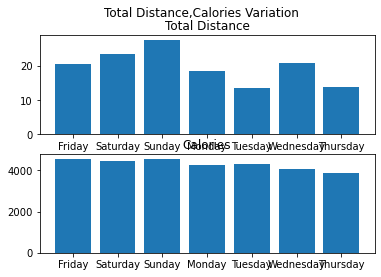

In [9]:
# Visualizing what is the relation between the DAY and the total distance for a particular person
def day_dis(id):

    fig, axs = plt.subplots(2) 
    axs[0].bar(data['Day'],data['TotalDistance'])
    axs[0].set_title('Total Distance')
    axs[1].bar(data['Day'],data['Calories']) 
    fig.suptitle('Total Distance,Calories Variation') 
    axs[1].set_title('Calories')
        
day_dis(1624580081)
plt.show()

In [10]:
totdis=data.groupby(['Id'])['TotalDistance'].agg('sum')


In [11]:
data.loc[(data['Id']==1624580081),'TotalDistance'].sum()

52.18999946117401

## Feature Creation
#### Calculating the Step size of  the individual everyday of the Week

\begin{equation*}
StepSize=\frac{Total Tracker Distance}{Total Steps}
\end{equation*}

In [12]:
#Step size is in Kilometers
data['StepSize']=None
for i in range(0,len(data['TotalDistance'])):
    data['StepSize'][i]=((data['TrackerDistance'][i]) / data['TotalSteps'][i])
data['StepSize']

D:\Softwares\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Softwares\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


0      0.000646129
1      0.000655915
2      0.000669755
3       0.00067493
4      0.000651939
          ...     
452    0.000885982
453    0.000489982
454    0.000966067
455    0.000758803
456    0.000757447
Name: StepSize, Length: 457, dtype: object

In [13]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,StepSize
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,Friday,0.000646129
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,Saturday,0.000655915
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,Sunday,0.000669755
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,Monday,0.00067493
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,Tuesday,0.000651939


### Visualizing the StepSize of a person for each day of the week

In [14]:
def day_stepsize(*id):
    for i in id:
        print('Id :',i)
        plt.ylabel('Step Size')
        plt.show()
        return plt.bar('Day','StepSize',data=data.loc[(data['Id']==i),['Day','StepSize']])

Id : 5553957443


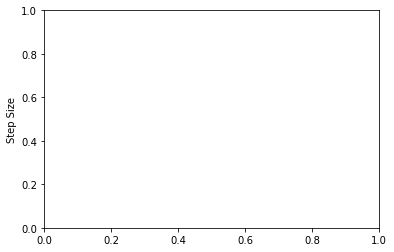

Id : 5577150313


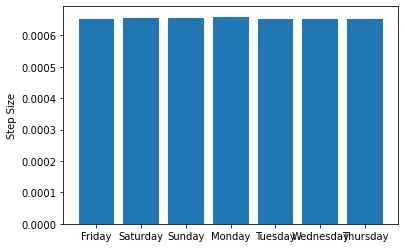

Id : 6117666160


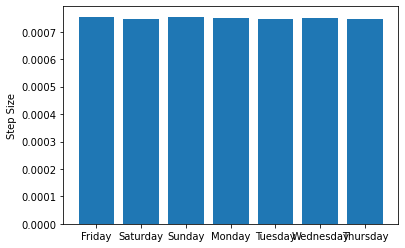

Id : 6290855005


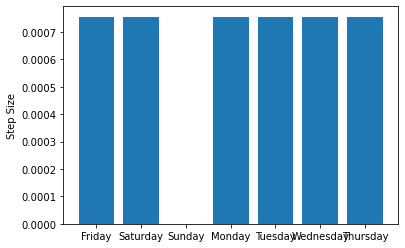

Id : 6391747486


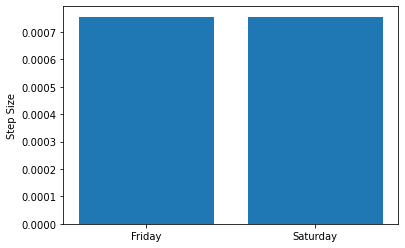

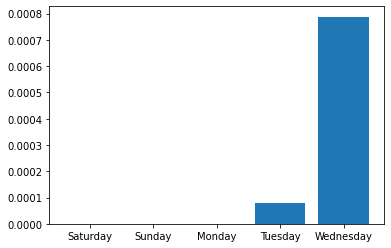

In [15]:
for i in data['Id'].unique()[20:25]:
    day_stepsize(i)


##### Insight: Hence we can see that those people who walk daily have a more uniform step size than those who dont

In [16]:
data['Id'].unique()

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
       2891001357, 3372868164, 3977333714, 4020332650, 4057192912,
       4319703577, 4388161847, 4445114986, 4558609924, 4702921684,
       5553957443, 5577150313, 6117666160, 6290855005, 6391747486,
       6775888955, 6962181067, 7007744171, 7086361926, 8053475328,
       8253242879, 8378563200, 8583815059, 8792009665, 8877689391],
      dtype=int64)

In [17]:
ds=data.loc[data['Id']==1503960366,['Day','TotalDistance']]
for j in range(0,len(ds['TotalDistance'])):
    print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [18]:
data[0:18]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,StepSize
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,Friday,0.000646129
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,Saturday,0.000655915
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,Sunday,0.000669755
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,Monday,0.00067493
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,Tuesday,0.000651939
5,1503960366,2016-03-30,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,Wednesday,0.000652689
6,1503960366,2016-03-31,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,Thursday,0.000641319
7,1503960366,2016-04-01,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,Friday,0.00064182
8,1503960366,2016-04-02,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,Saturday,0.000644559
9,1503960366,2016-04-03,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,Sunday,0.000635982


### Step Size vs Calories

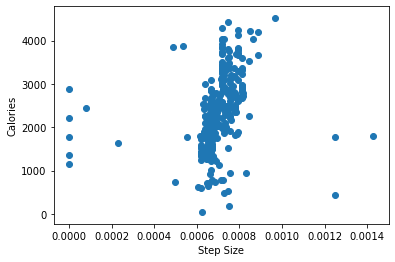

In [19]:
plt.scatter('StepSize','Calories',data=data)
plt.xlabel('Step Size')
plt.ylabel('Calories')
plt.show()

##### Insight : Hence we can see that most people have a step size between 0.6 metre - 0.8 metre

### 

Text(0, 0.5, 'Calories')

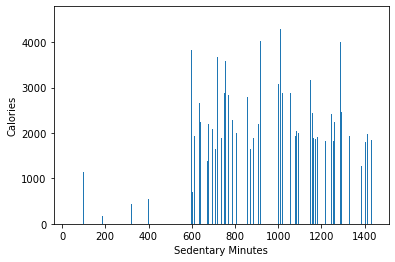

In [20]:
plt.bar('SedentaryMinutes','Calories',data=data)
plt.xlabel('Sedentary Minutes')
plt.ylabel('Calories')

## Total Distance Vs Calories 
#### As we know can expect to be a linear relationship 

Text(0, 0.5, 'Calories')

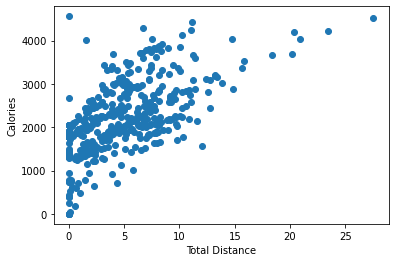

In [21]:
plt.scatter('TotalDistance','Calories',data=data)
plt.xlabel('Total Distance')
plt.ylabel('Calories')

### Insight : Here we can see a (Tracker Error) as we see for 0 Distance there are calories burnt , Most probable these calories have been lost from other activities (i.e walking on a trademill)

## Activity level Variations

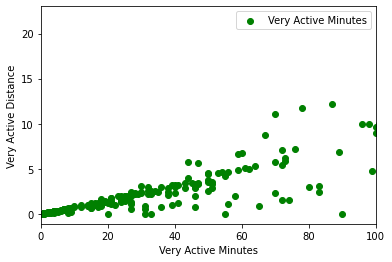

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter('VeryActiveMinutes','VeryActiveDistance', data=data, c='g', marker="o", label='Very Active Minutes')
ax1.set_xlim(0,100)
ax1.set_xlabel('Very Active Minutes')
ax1.set_ylabel('Very Active Distance')
plt.legend(loc='upper right');
plt.show()

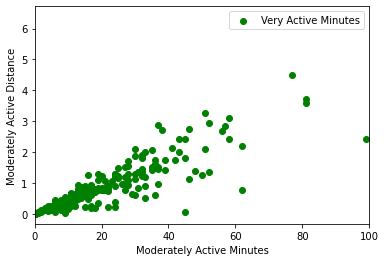

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter('FairlyActiveMinutes','ModeratelyActiveDistance', data=data, c='g', marker="o", label='Very Active Minutes')
ax1.set_xlim(0,100)
ax1.set_xlabel('Moderately Active Minutes')
ax1.set_ylabel('Moderately Active Distance')
plt.legend(loc='upper right');
plt.show()

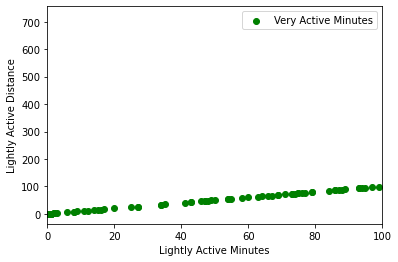

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter('LightlyActiveMinutes','LightlyActiveMinutes', data=data, c='g', marker="o", label='Very Active Minutes')
ax1.set_xlim(0,100)
ax1.set_xlabel('Lightly Active Minutes')
ax1.set_ylabel('Lightly Active Distance')
plt.legend(loc='upper right');
plt.show()

In [25]:
data.to_csv('FitBitCleanedDataset.csv', header=False, index=False) 